idea is to see the affect of the mites on the population of the bees

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [3]:
α = 7 #death rate of the infected 
γ = 1.20 #reproduction of rate of the Hive
λ = .25 #reproduction rate of the mites

In [4]:
def ODE(y,t,α,γ,λ):
    bees, mites = y
    dydt = [-mites*α+bees*γ,1+((mites*bees)/bees)*λ]
    return dydt

In [5]:
y0 = [100,.01]

In [6]:
t = np.linspace(0,12,360)

In [7]:
sol = odeint(ODE,y0,t,args = (α,γ,λ))

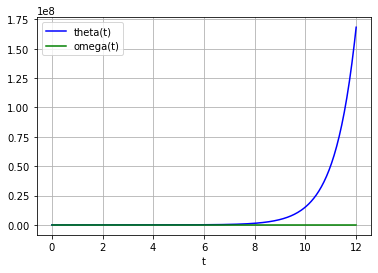

In [8]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

# SI with birth

susceptible
infected
recovered

In [99]:
γ = 1.3 #infection rate
ω = .75 #recovery rate
t = np.linspace(0,12,365)
K = 60000 #carying capacity
death_rate  = .3
y = [.99,.01,30000]

In [100]:
def ODE(y,t,γ,ω):
    sus,inf,N = y
#     if 3<t and t<6:
    if np.cos(t*(2*np.pi/12)-1.5)*N/6 > 0: 
        return [(-inf*γ*sus+ω*inf),(inf*γ*sus - ω*inf),(1-inf)*np.cos(t*(2*np.pi/12)-1.5)*N/6]
    else:
        return [(-inf*γ*sus+ω*inf),(inf*γ*sus - ω*inf),(1+inf)*np.cos(t*(2*np.pi/12)-1.5)*N/6]
        
#     else:
#         return [(-inf*γ*sus+ω*inf),(inf*γ*sus - ω*inf),-.01*N*(1-N/K)]

In [101]:
# remove death in SIR model
# first priority to make birthrate correlated with number of healthy bees and with season if possible try different solver

In [102]:
sol = odeint(ODE,y,t,args = (γ,ω))
y = [1,0,30000]
γ = 0
healthy_sol = odeint(ODE,y,t,args = (γ,ω))

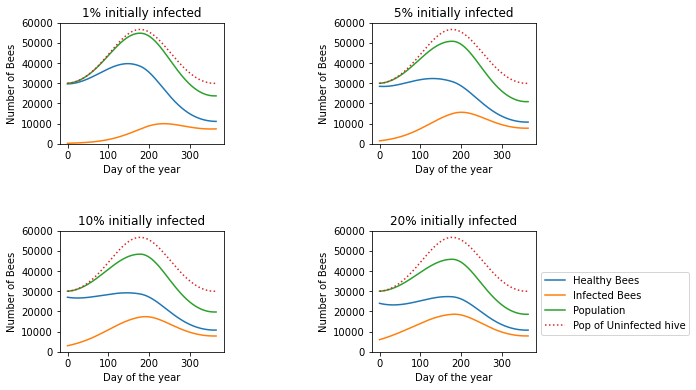

In [118]:
M = np.linspace(0,365,365)
n = sol[:,2]
inf_rate = [.01,.05,.1,.2]
rates = ["1% initially infected","5% initially infected","10% initially infected","20% initially infected"]
for i in range(4):
    γ = 1.3 #infection rate
    ω = .75 #recovery rate
    y = [1 - inf_rate[i],inf_rate[i],30000]
    t = np.linspace(0,12,365)
    sol = odeint(ODE,y,t,args = (γ,ω))
    y = [1,0,30000]
    γ = 0
    healthy_sol = odeint(ODE,y,t,args = (γ,ω))
    plt.subplot(2,2,(i+1))
    plt.plot(M,sol[:,0]*n,label = 'Healthy Bees')
    plt.plot(M,(sol[:,1]*n),label = 'Infected Bees')
    plt.plot(M,sol[:,2],label = 'Population')
    plt.plot(M,healthy_sol[:,2],label = "Pop of Uninfected hive",linestyle = ':')
    plt.title(rates[i])
    plt.xlabel("Day of the year")
    plt.ylabel("Number of Bees")
    plt.ylim(0,60000)
plt.legend(bbox_to_anchor=(1., .5, 0.3, 0.2))
plt.tight_layout()
plt.gcf().set_size_inches(14,6)
plt.savefig("Romneys_Graph.jpg")


In [98]:
# can i add actual population of the bees by 
#tying it to the susceptible group

In [25]:
def pop_model(recovered,bees):
    u = np.zeros_like(recovered)
    u[0] = bees
    for i in range(1,len(recovered)):
        u[i]= u[i-1] - (recovered[i]-recovered[i-1])*bees/2
    return u

(365,)


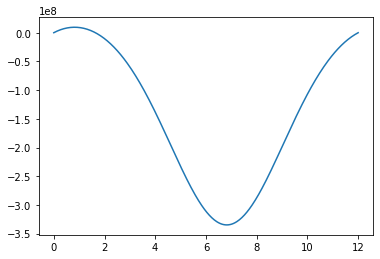

In [53]:
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
infected = odeint(ODE,y,t,args = (γ,ω))[:,1]
print(recoverd.shape)
bees = np.ones_like(recoverd)*1000
u = pop_model(recoverd,15000)
plt.plot(t,u)

how would an infestation affect the die off rate of the hive
here's what a year of bees with high amount of mites looks like over the course of the year.
what happens to mites during the winter


# SIS model attempt

In [17]:
# constant recruitment rate A
A = .2
#fertility rate of suseptible individuals
b = .1
# fertility of infected b* epsilon 
#prob newborn is uninfected
ρ = .1
#probnewborn infected = 1-ρ
#natural death rate
d = 0.1
#disease related death rate
dd = 0.3
#recovery const
γ = .5
#contact rate multiplier
β = 2
#contact rate
λ = lambda N: β*N
#multiplier for the disease related death rate
α = .03
#effect of disease
eps = .10

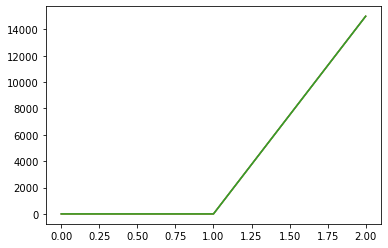

In [18]:
# differential equations
def ODE(y,t):
    sus, inf, pop = y
    dydt = [ A + b*(sus+ρ*eps*inf) - (λ(pop)/pop)*sus*inf,
            (λ(pop)/pop)*sus*inf+b*eps*(1-ρ)*inf - (γ+α+d)*inf,
            A+(b-d)*pop-(α+b*(1-eps))*inf]
    return dydt
#inital conditions
initial = [.90,.1,15000]
t = np.linspace(0,12,365)
result = odeint(ODE,initial,t)
plt.plot(result[0])
plt.plot(result[1])
plt.plot(result[2])

# how to make porter and my model's interact?

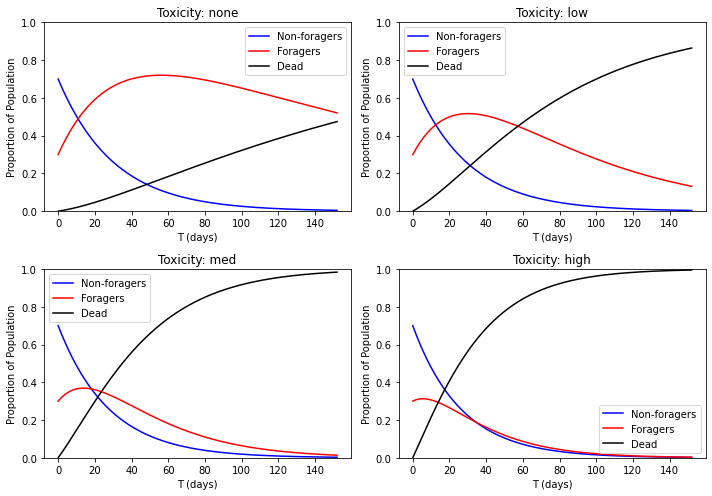

In [19]:
from scipy.integrate import solve_ivp

def ode_maker(tox):
    toxicity_levels = {'high': (.05, .005),
                       'med': (.03, .003),
                       'low': (.01, .001),
                       'none': (0, 0)}
    b = 0 # birth rate
    c = 0.033 # prop of workers becoming foragers
    d = .005 # normal death rate of foragers
    p = toxicity_levels[tox][0] # prop of foragers poisoned from contact
    q = toxicity_levels[tox][1] # prop of bees dying from poisoned food. I had wanted to make the amount of poisoned food a function of the number of foragers and then use that number to determine bees dying from poisoned food, but alas.
    
    def ode(t, y):
        W = y[0] # non-forager workers
        F = y[1] # foragers
        D = y[2] # ded bbeess
        return np.array([b + -c*W - q*W,
                         c*W - d*F - p*F - q*F,
                         d*F + q*W + p*F + q*F])
    return ode

# Set up initial values
total_hive_population = 30000
worker_bees = int(.98*30000)
non_foragers = worker_bees * .7
foragers = worker_bees * .3
dead = 0
y0 = np.array([non_foragers, foragers, dead]) / worker_bees
t0 = 0
tf = 153 # 153 is the number of days between May and October, when bees would be out foraging

for i, toxicity in enumerate(['none', 'low', 'med', 'high']):
    built_ode = ode_maker(toxicity)

    # Calculate ODE
    sol = solve_ivp(built_ode, (t0, tf), y0, t_eval=np.arange(tf))
    
    # Plot results
    plt.subplot(2, 2, i+1)
    plt.plot(sol.t, sol.y[0], label='Non-foragers', color='blue')
    plt.plot(sol.t, sol.y[1], label='Foragers', color='red')
    plt.plot(sol.t, sol.y[2], label='Dead', color='black')
    plt.ylim(0, 1)
    plt.ylabel('Proportion of Population')
    plt.xlabel('T (days)')
    plt.legend()
    plt.title('Toxicity: {}'.format(toxicity))
plt.gcf().set_size_inches(10, 7)
plt.tight_layout()
plt.show()

# The Unification

In [20]:
from scipy.integrate import solve_ivp

def ode_maker(tox):
    toxicity_levels = {'high': (.05, .005),
                       'med': (.03, .003),
                       'low': (.01, .001),
                       'none': (0, 0)}
    b = 0 # birth rate
    c = 0.033 # prop of workers becoming foragers
    d = .005 # normal death rate of foragers
    p = toxicity_levels['low'][0] # prop of foragers poisoned from contact
    q = toxicity_levels['low'][1] # prop of bees dying from poisoned food. I had wanted to make the amount of poisoned food a function of the number of foragers and then use that number to determine bees dying from poisoned food, but alas.
    γ = 2 #infection rate
    w = .75 #recovery rate
    def ode(t,y0):
        Sn = y0[0] #sus nonforagers
        Sf = y0[1] #sus foragers
        In = y0[2] #inf non-foragers
        If = y0[3] #inf non-foragers
        In = y0[4] #ded
        return np.array([-c*Sn-γ*(In+If)*Sn-q*Sn*(Sf+If)+ w*In,
            c*Sn-γ*(In+If)*Sf-d*Sf-p*Sf-q*Sf*(Sf+If)+w*If,
            γ*(In+If)*Sn - c*In-w*In - (1-w)*In-q*In*(Sf+If),
            γ*(In+If)*Sf + c*In-w*If-(1-w)*If-p*If - q*If*(Sf+If)-d*If,
            q*Sn*(Sf+If)+d*Sf +p*Sf+q*Sf*(Sf+If)+(1-w)*In+q*In*(Sf+If)+(1-w)*If+p*If+q*If*(Sf+If)])
    return ode
# initial conditions
hive_pop = 30000
workers = int(.98*hive_pop)
non_foragers = int(workers*.7)
foragers = int(workers*.3)
ded = 0
#suppose we start out with 10% of the hive infected with mites
initial_mite_outbreak = .1
Sn = workers*(1-initial_mite_outbreak)
Sf = foragers * (1 - initial_mite_outbreak)
In = workers * initial_mite_outbreak
If = foragers * initial_mite_outbreak
D = 0
t0 = 0
tf = 153 # 153 is the number of days between May and October, when bees would be out foraging

y0 = np.array([Sn,Sf,In,If,D])
#sol = odeint(ODE,y0,t,args = (α,γ,λ))
ODE = ode_maker(7)
t = np.arange(0,4,3)
sol = solve_ivp(ODE,t,y0)
plt.plot(sol.t,sol.y[0],label = 'susceptible Non-Foragers')
plt.plot(sol.t,sol.y[1],label = 'susceptible Foragers')
plt.plot(sol.t,sol.y[2],label = 'Infected Non-Foragers')
plt.plot(sol.t,sol.y[3],label = 'Infected Foragers')
plt.plot(sol.t,sol.y[4],label = 'Dead')
plt.gcf().set_size_inches(10, 7)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [1]:
def ODE(y,t,γ,ω):
    sus, inf, rec,ded = y
    dydt = [-inf*γ*sus, inf*γ*sus - ω*inf, ω*inf*(1-death_rate), ω*inf*death_rate]
    return dydt

In [504]:
# remove death in SIR model
# first priority to make birthrate correlated with number of healthy bees and with season if possible try different solver

In [510]:
t = np.linspace(1,365,365,dtype = 'int')
t

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18